# <font color="red"> Image Classification with CNN for CIFAR_10 Data

* The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.There are in total 50000 train images and 10000 test images.
* Please use this code to get the data and use Tensorflow, Keras and CNN to classify images.

* 0: airplane
* 1: automobile
* 2: bird
* 3: cat
* 4: deer
* 5: dog
* 6: frog
* 7: horse
* 8: ship
* 9: truck

## <font color="purple"> Importing and Understanding the Data

In [80]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [81]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [82]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [83]:
x_train[:2]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [84]:
import matplotlib.pyplot as plt

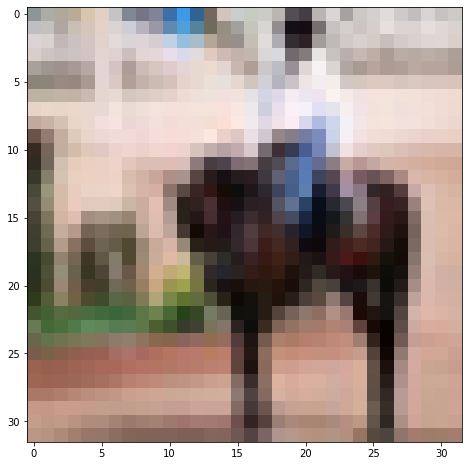

In [85]:
plt.figure(figsize=(8,8))
plt.imshow(x_train[11])

## <font color="purple"> Preparing the Data

In [86]:
def plot_image(x,y, index):
  
  plt.figure(figsize=(10,5))
  plt.imshow(x[index])
  plt.xlabel(y[index])

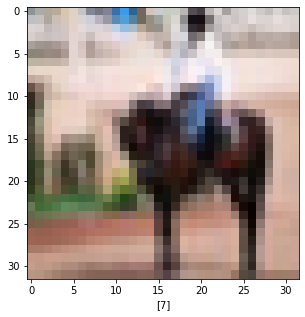

In [87]:
plot_image(x_train,y_train,11)


In [88]:
classe=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [89]:
y_train[:6] #2D 

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [90]:
y_train.shape #2D # y_train is a 2D numpy array

(50000, 1)

TR
* y_train'i tek boyuta indirmek, özellikle sınıflandırma problemleri için yaygın bir işlemdir. Bu işlem, veri setindeki 2 boyutlu olarak saklamak yerine 1 boyutlu bir vektör olarak saklar
* tek boyuta indirmek için numpy'nin flatten() fonksiyonunu kullanabiliriz

EN
* Reducing y_train to one dimension is a common operation, especially for classification problems. This process stores it as a 1D vector instead of 2D in the dataset.
* we can use numpy's flatten() function to reduce it to one size

In [91]:
#1D 
y_train = y_train.flatten()
y_test = y_test.flatten()

In [92]:
y_train.shape

(50000,)

In [93]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

TR
* x_train verisi 32x32 boyutunda ve 3 renk kanalına sahip 50.000 görüntü içermektedir. Bu görüntülerin her biri 0-255 aralığında tamsayı değerlerinden oluşan bir piksel matrisidir. Bu değerlerin 0-1 aralığına indirgenmesi modelin daha hızlı öğrenmesine yardımcı olur

* **Normalize işlemi**, görüntülerdeki piksel değerlerinin orijinal değerlere göre daha küçük olduğu anlamına gelir. Bu nedenle, modelin öğrenmesi için gereken parametre sayısı azalır. Ayrıca bu işlem sayesinde aşırı uyum(overfitting) problemi de azaltılabilir

EN
* x_train data can take 32x32 and contains 50,000 images with 3 color channels. Each of this image is a pixel matrix consisting of integer values ​​in the range 0-255. Depending on the 0-1 range of these values, it helps the model run faster.

* **Normalization process** means that the pixel values ​​in the images are smaller than their original values. Hence the reduction in the number of parameters required for modeling learning. In addition, this process can reduce the problem of overfitting.

In [94]:
#normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

## <font color="purple"> Build Artifical Neural Network for Image Classification

In [95]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization

In [96]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = "relu", padding="same",input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), activation = "relu", padding="same"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3), activation = "relu", padding="same"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3), activation = "relu", padding="same"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),optimizer='adam',metrics='accuracy') 


In [97]:
history=model.fit(x_train,y_train, epochs=40)

Epoch 1/40
1563/1563 [==============================] - 14s 6ms/step - loss: 1.4646 - accuracy: 0.4785
Epoch 2/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0633 - accuracy: 0.6191
Epoch 3/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9039 - accuracy: 0.6777
Epoch 4/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7999 - accuracy: 0.7169
Epoch 5/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7353 - accuracy: 0.7404
Epoch 6/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6855 - accuracy: 0.7591
Epoch 7/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6419 - accuracy: 0.7748
Epoch 8/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6077 - accuracy: 0.7876
Epoch 9/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5763 - accuracy: 0.7971
Epoch 10/40
1563/1563 [==============================] - 10s 6ms/step - l

### <font color="blue"> Using one-hot encoder

In [98]:
from keras.utils import to_categorical

#convert y_train to one-hot encoder array
y_train = to_categorical(y_train, num_classes=10)

#convert y_test to one-hot encoder array
y_test = to_categorical(y_train, num_classes=10)

In [99]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = "relu", padding="same",input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), activation = "relu", padding="same"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3), activation = "relu", padding="same"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3), activation = "relu", padding="same"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(10, activation="softmax"))



model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [100]:
history=model.fit(x_train,y_train, epochs=40)

Epoch 1/40
1563/1563 [==============================] - 14s 7ms/step - loss: 1.4415 - accuracy: 0.4869
Epoch 2/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0253 - accuracy: 0.6354
Epoch 3/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8737 - accuracy: 0.6906
Epoch 4/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7792 - accuracy: 0.7265
Epoch 5/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7175 - accuracy: 0.7500
Epoch 6/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6607 - accuracy: 0.7675
Epoch 7/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6236 - accuracy: 0.7809
Epoch 8/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5873 - accuracy: 0.7925
Epoch 9/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5549 - accuracy: 0.8053
Epoch 10/40
1563/1563 [==============================] - 11s 7ms/step - l

TR
* **SparseCategoricalCrossentropy** kayıp fonksiyonu, çoklu sınıflı sınıflandırma problemleri için kullanılan bir kayıp fonksiyonudur. Bu fonksiyon, tahmin edilen ve gerçek sınıflar arasındaki farkı ölçer ve bu farka dayanarak bir hata skoru üretir. Bu skor modelin eğitimi sırasında en iyileştirme işleminde kullanılır.

* **one-hot encoding**, sınıflandırma problemlerinde etiketleri sayısal vektörler olarak temsil etmek için yaygın bir yöntemdir. Bu yöntemde, etiketler farklı boyutlarsaki ikili vektörlerle kodlanır, her sınıf için bir vektör oluşturulur ve gerçek sınıf vektöründe yalnızca ilgili sınıfın gösterimi 1, diğer sınıfın gösterimi ise 0 olacak şekilde kodlanır

EN

* The **SparseCategoricalCrossentropy** loss function is a loss function used for multi-class classification problems. This function measures the difference between the predicted and actual classes and generates an error score based on this difference. This score is used in the optimization process during the training of the model.

* **one-hot encoding** is a common method for representing tags as numeric vectors in classification problems. In this method, the labels are encoded with binary vectors of different sizes, a vector is created for each class, and only the representation of the relevant class is encoded in the real class vector, with the representation of the other class being 0.

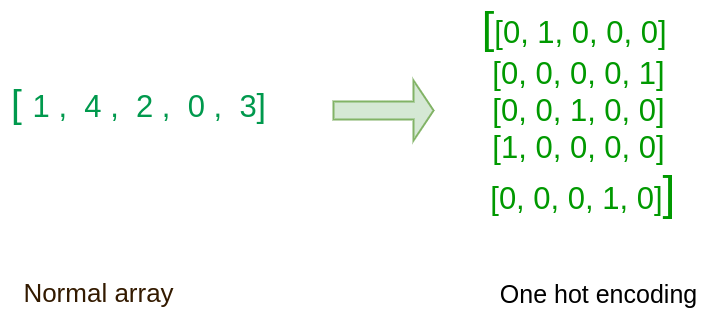

TR
* one-hot encoding, sınıflandırma problemlerinde etiketleri sayısal olarak temsil etmek için kullanılır, çünkü etiketler doğrudan sayısal değerler olmayabilir fakat dezavantaj olarak büyük veri setlerinde çok sayıda sınıf varsa, bu yöntem veri boyutunu arttırabilir ve hesaplama maliyetini arttırabilir. Bunun yerine daha az boyutlu bir vektörler sınıfları temsil etmek için **"embedding"** gibi farklı bir yöntem kullanılır

EN
* One-hot encoding is used to represent tags numerically in classification problems because tags may not be numeric values ​​directly, but disadvantageously, if large datasets have many classes, this method can increase data size and increase computational cost. Instead a different method like **"embedding"** is used to represent classes with less dimensional vectors